In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Model,layers,optimizers,callbacks,losses,metrics
from tensorflow.keras.models import load_model

In [47]:
data=pd.read_csv("OnlineNewsPopularity.csv")
data.columns=[col.strip() for col in data.columns]
data=data[data['shares']<100000]
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [48]:
data['shares'].describe(percentiles=[0.1,0.5,0.95])

count    39586.000000
mean      3100.751579
std       5991.066519
min          1.000000
10%        708.000000
50%       1400.000000
95%      10600.000000
max      98700.000000
Name: shares, dtype: float64

<Axes: ylabel='Frequency'>

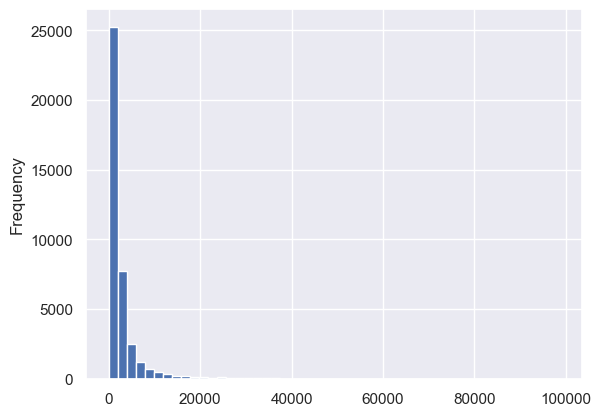

In [49]:
data['shares'].plot.hist(bins=50)

In [50]:
high_share_thresh=10000
data["high_shares_y_n"]=data["shares"].apply(lambda shares:1 if shares>high_share_thresh else 0)

In [51]:
data.dtypes.value_counts()

float64    59
int64       2
object      1
Name: count, dtype: int64

In [52]:
data.drop("url",axis=1,inplace=True)
data.shape

(39586, 61)

In [53]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares_y_n
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [54]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,high_shares_y_n
count,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,...,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000
mean,354.523417,10.397994,546.517254,0.548278,0.996615,0.689271,10.878619,3.294271,4.541757,1.248446,...,0.756760,-0.259474,-0.521874,-0.107452,0.282267,0.071432,0.341809,0.155989,3100.751579,0.053731
std,214.209866,2.113984,470.721844,3.523278,5.235048,3.267194,11.327396,3.855810,8.308267,4.108235,...,0.247678,0.127641,0.290188,0.095269,0.324161,0.265346,0.188803,0.226225,5991.066519,0.225489
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470864,1.000000,0.625767,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328282,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000,0.000000
50%,339.000000,10.000000,409.500000,0.539216,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,542.000000,12.000000,716.000000,0.608584,1.000000,0.754627,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.148504,0.500000,0.250000,2800.000000,0.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,98700.000000,1.000000


In [55]:
unique_counts=pd.DataFrame()
counts=[]
for col in data.columns:
    counts.append(data[col].nunique())
unique_counts['feature']=data.columns
unique_counts['unique_count']=counts
unique_counts=unique_counts.sort_values(by='unique_count')

Preprocess Data

In [56]:
targets=['shares','high_shares_y_n']
features=[col for col in data.columns if col not in targets]

In [57]:
X,Y=data.drop(targets,axis=1),data[targets]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
Y_train=Y_train.astype('float')
Y_test=Y_test.astype('float')

In [58]:
Y_test['shares'].describe()

count     3959.000000
mean      3067.948472
std       5827.827336
min          8.000000
25%        933.500000
50%       1400.000000
75%       2700.000000
max      81700.000000
Name: shares, dtype: float64

In [59]:
unique_counts[unique_counts['unique_count']==2]

,feature,unique_count
30,weekday_is_monday,2
37,is_weekend,2
36,weekday_is_sunday,2
35,weekday_is_saturday,2
34,weekday_is_friday,2
33,weekday_is_thursday,2
32,weekday_is_wednesday,2
31,weekday_is_tuesday,2
17,data_channel_is_world,2
16,data_channel_is_tech,2


In [60]:
scale_feats,do_not_scale=[],[]
for feature in features:
    if X_train[feature].nunique()>2:
        scale_feats.append(feature)
    else:
        do_not_scale.append(feature)

In [61]:
scaler=StandardScaler()
X_train.loc[:,scale_feats]=scaler.fit_transform(X_train[scale_feats])
X_test.loc[:,scale_feats]=scaler.transform(X_test[scale_feats])
output_scaler=StandardScaler()
Y_train.loc[:,'shares']=[val[0] for val in output_scaler.fit_transform(Y_train['shares'].values.reshape(-1,1))]
Y_test.loc[:,'shares']=[val[0] for val in output_scaler.transform(Y_test['shares'].values.reshape(-1,1))]

Define Model Architecture

In [62]:
num_features=len(features)
shared_dense_units_list=[64,32]
regression_dense_units_list=[64,16]
classification_dense_units_list=[32,16]

In [63]:
def multi_task_model(num_features,shared_dense_units_lists,regression_dense_units_list,classification_dense_units_list,batch_norm):
    input_=layers.Input(shape=(num_features,),name='Input')
    shared_x=layers.BatchNormalization(name=f'bn_inp')(input_)
    for i,dense_units in enumerate(shared_dense_units_list):
        shared_x=layers.Dense(units=dense_units,name=f'shared_dense_{i+1}')(shared_x)
        shared_x=layers.ReLU(name=f'shared_relu_{i+1}')(shared_x)
        if batch_norm:
            shared_x=layers.BatchNormalization(name=f'shared_bn_{i+1}')(shared_x)
        shared_x=layers.Dropout(0.2,name=f'shared_dropout_{i+1}')(shared_x)
    if len(regression_dense_units_list)>0:
        regr_x=layers.Dense(units=regression_dense_units_list[0],name='regr_dense_1')(shared_x)
        regr_x=layers.ReLU(name=f'regr_relu_1')(regr_x)
    for i,dense_units in enumerate(regression_dense_units_list[1:]):
        regr_x=layers.Dense(units=dense_units,name=f'regr_dense_{i+2}')(regr_x)
        regr_x=layers.ReLU(name=f'regr_relu_{i+2}')(regr_x)
        if batch_norm:
            regr_x=layers.BatchNormalization(name=f'regr_bn_{i+1}')(regr_x)
        regr_x=layers.Dropout(0.2,name=f'regr_dropout_{i+1}')(regr_x)
    if len(regression_dense_units_list)>0:
        regr_output=layers.Dense(1,name='regr_out')(regr_x)
    else:
        regr_output=layers.Dense(1,name='regr_out')(shared_x)
    if len(classification_dense_units_list)>0:
        clsf_x=layers.Dense(units=classification_dense_units_list[0],name='clsf_dense_1')(shared_x)
        clsf_x=layers.ReLU(name=f'clasf_relu_1')(clsf_x)
    for i,dense_units in enumerate(classification_dense_units_list[1:]):
        clsf_x=layers.Dense(units=dense_units,name=f'clsf_dense_{i+2}')(clsf_x)
        clsf_x=layers.ReLU(name=f'clasf_relu_{i+2}')(clsf_x)
        if batch_norm:
            clsf_x=layers.BatchNormalization(name=f'clsf_bn_{i+1}')(clsf_x)
        clsf_x=layers.Dropout(0.2,name='clsf_out')(clsf_x)
    if len(classification_dense_units_list)>0:
        clsf_output=layers.Dense(1,name='p_clsf',activation='sigmoid')(clsf_x)
    else:
        clsf_output=layers.Dense(1,name='p_clsf',activation='sigmoid')(shared_x)
    model = Model(input_, [regr_output,clsf_output], name='model')
    return model


def plotmetrics(model_history,metrics):
    n_cols=2
    n_rows=int(np.ceil(len(metrics)))
    fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(12,5*n_rows))
    ax=np.array(ax)
    ax=ax.flatten()
    for i,metric in enumerate(metrics):
        ax[i].plot(model_history.history[metric],label='Training')
        ax[i].plot(model_history.history['val_'+metric],label='Validation')
        ax[i].set_title(metric)
        ax[i].legend()
        ax[i].set(xlabel='Epoch')
    fig.tight_layout()
    plt.show()
    return fig

In [64]:
model=multi_task_model(num_features=num_features,shared_dense_units_lists=shared_dense_units_list,regression_dense_units_list=regression_dense_units_list,classification_dense_units_list=classification_dense_units_list,batch_norm=False)

In [65]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)            │ (None, 59)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_inp (BatchNormalization)   │ (None, 59)                │             236 │ Input[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ shared_dense_1 (Dense)        │ (None, 64)                │           3,840 │ bn_inp[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ shared_relu_1 (ReLU)          │ (None, 64)                │               0 │ shared_dense_1[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ shared_dropout_1 (Dropout)    │ (None, 64)                │               0 │ shared_relu_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ shared_dense_2 (Dense)        │ (None, 32)                │           2,080 │ shared_dropout_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ shared_relu_2 (ReLU)          │ (None, 32)                │               0 │ shared_dense_2[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ shared_dropout_2 (Dropout)    │ (None, 32)                │               0 │ shared_relu_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ regr_dense_1 (Dense)          │ (None, 64)                │           2,112 │ shared_dropout_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ clsf_dense_1 (Dense)          │ (None, 32)                │           1,056 │ shared_dropout_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ regr_relu_1 (ReLU)            │ (None, 64)                │               0 │ regr_dense_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ clasf_relu_1 (ReLU)           │ (None, 32)                │               0 │ clsf_dense_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ regr_dense_2 (Dense)          │ (None, 16)                │           1,040 │ regr_relu_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ clsf_dense_2 (Dense)          │ (None, 16)                │             528 │ clasf_relu_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ regr_relu_2 (ReLU)            │ (None, 16)                │               0 │ regr_dense_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ clasf_relu_2 (ReLU)           │ (None, 16)                │               0 │ clsf_dense_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ regr_dropout_1 (Dropout)      │ (None, 16)                │               0 │ regr_relu_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 10,926 (42.68 KB)

 Trainable params: 10,808 (42.22 KB)

 Non-trainable params: 118 (472.00 B)

Train Model

In [66]:
import tensorflow.keras.backend as K
def scaled_mse(y_true,y_pred):
    error=y_true-y_pred
    sqr_error=K.square(error)
    mean_sqr_error=K.mean(sqr_error)
    return mean_sqr_error/3.

def output_form(data):
    regr=data['shares']
    regr=np.array(regr)
    clsf=data['high_shares_y_n']
    clsf=np.array(clsf)
    return(regr,clsf)

train_Y=output_form(Y_train)
test_Y=output_form(Y_test)

In [67]:
EPOCHS=500

In [68]:
learning_rate=1e-04

opt=optimizers.Adam(learning_rate)
model.compile(optimizer=opt,
             loss={'p_clsf':tf.keras.losses.BinaryCrossentropy(),
                  'regr_out':tf.keras.losses.MeanSquaredError()},
             metrics={'p_clsf':[tf.keras.metrics.AUC(name='auc')],
                     'regr_out': [tf.keras.metrics.RootMeanSquaredError(name='rmse'),tf.keras.metrics.MeanAbsolutePercentageError(name='mape')]})

In [69]:
train_Y_reshaped = train_Y[:X_train.shape[0]]

In [70]:
early_stop=callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True,min_delta=0.001)
history=model.fit(x=X_train.values,
                 y=train_Y,
                 validation_data=(X_train.values,train_Y_reshaped),
                 epochs=EPOCHS,
                 callbacks=[early_stop],
                 batch_size=64)

Epoch 1/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 1.6675 - p_clsf_auc: 0.5007 - regr_out_mape: 493.2545 - regr_out_rmse: 1.0702 - val_loss: 1.2414 - val_p_clsf_auc: 0.4953 - val_regr_out_mape: 203.2376 - val_regr_out_rmse: 0.9952
Epoch 2/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 1.2793 - p_clsf_auc: 0.4963 - regr_out_mape: 252.4266 - regr_out_rmse: 1.0051 - val_loss: 1.2037 - val_p_clsf_auc: 0.5671 - val_regr_out_mape: 167.9689 - val_regr_out_rmse: 0.9916
Epoch 3/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1.1757 - p_clsf_auc: 0.5330 - regr_out_mape: 218.8090 - regr_out_rmse: 0.9622 - val_loss: 1.1898 - val_p_clsf_auc: 0.6272 - val_regr_out_mape: 165.4422 - val_regr_out_rmse: 0.9895
Epoch 4/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 1.2426 - p_clsf_auc: 0.5830 - regr_out_mape: 214.9044 - regr_out_rmse: 1.0043 - val_loss: 1.1804 - val_p_clsf_auc: 0.6612 - val_regr_out_mape: 171.8705 - val_regr_out_rmse: 0.9877
Epoch 5/500
557/557 ━━━━━━━━━

557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.0834 - p_clsf_auc: 0.7094 - regr_out_mape: 344.7022 - regr_out_rmse: 0.9430 - val_loss: 1.1096 - val_p_clsf_auc: 0.7581 - val_regr_out_mape: 239.5163 - val_regr_out_rmse: 0.9601
Epoch 60/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.1015 - p_clsf_auc: 0.7212 - regr_out_mape: 276.1667 - regr_out_rmse: 0.9529 - val_loss: 1.1113 - val_p_clsf_auc: 0.7585 - val_regr_out_mape: 232.3619 - val_regr_out_rmse: 0.9608
Epoch 61/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.1084 - p_clsf_auc: 0.7225 - regr_out_mape: 281.6065 - regr_out_rmse: 0.9573 - val_loss: 1.1079 - val_p_clsf_auc: 0.7589 - val_regr_out_mape: 241.1345 - val_regr_out_rmse: 0.9593
Epoch 62/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.1095 - p_clsf_auc: 0.7376 - regr_out_mape: 292.0970 - regr_out_rmse: 0.9588 - val_loss: 1.1071 - val_p_clsf_auc: 0.7600 - val_regr_out_mape: 236.4177 - val_regr_out_rmse: 0.9590
Epoch 63/500
557/557 ━━━━━━━━━━━━━━━━━━━━

557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.1141 - p_clsf_auc: 0.7369 - regr_out_mape: 269.9151 - regr_out_rmse: 0.9606 - val_loss: 1.0530 - val_p_clsf_auc: 0.7734 - val_regr_out_mape: 227.3250 - val_regr_out_rmse: 0.9324
Epoch 118/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.0497 - p_clsf_auc: 0.7473 - regr_out_mape: 305.6154 - regr_out_rmse: 0.9263 - val_loss: 1.0529 - val_p_clsf_auc: 0.7737 - val_regr_out_mape: 228.4133 - val_regr_out_rmse: 0.9325
Epoch 119/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.0682 - p_clsf_auc: 0.7453 - regr_out_mape: 278.8494 - regr_out_rmse: 0.9345 - val_loss: 1.0517 - val_p_clsf_auc: 0.7739 - val_regr_out_mape: 233.5092 - val_regr_out_rmse: 0.9318
Epoch 120/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.1550 - p_clsf_auc: 0.7401 - regr_out_mape: 272.0730 - regr_out_rmse: 0.9810 - val_loss: 1.0550 - val_p_clsf_auc: 0.7741 - val_regr_out_mape: 217.8622 - val_regr_out_rmse: 0.9333
Epoch 121/500
557/557 ━━━━━━━━━━━━━━━━

557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.0225 - p_clsf_auc: 0.7420 - regr_out_mape: 278.7907 - regr_out_rmse: 0.9123 - val_loss: 0.9812 - val_p_clsf_auc: 0.7725 - val_regr_out_mape: 221.6021 - val_regr_out_rmse: 0.8939
Epoch 176/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0672 - p_clsf_auc: 0.7478 - regr_out_mape: 275.2865 - regr_out_rmse: 0.9362 - val_loss: 0.9901 - val_p_clsf_auc: 0.7718 - val_regr_out_mape: 210.4024 - val_regr_out_rmse: 0.8986
Epoch 177/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.0328 - p_clsf_auc: 0.7348 - regr_out_mape: 271.0464 - regr_out_rmse: 0.9149 - val_loss: 0.9769 - val_p_clsf_auc: 0.7745 - val_regr_out_mape: 215.3526 - val_regr_out_rmse: 0.8914
Epoch 178/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.0421 - p_clsf_auc: 0.7274 - regr_out_mape: 295.9656 - regr_out_rmse: 0.9192 - val_loss: 0.9734 - val_p_clsf_auc: 0.7729 - val_regr_out_mape: 213.7991 - val_regr_out_rmse: 0.8896
Epoch 179/500
557/557 ━━━━━━━━━━━━━━━

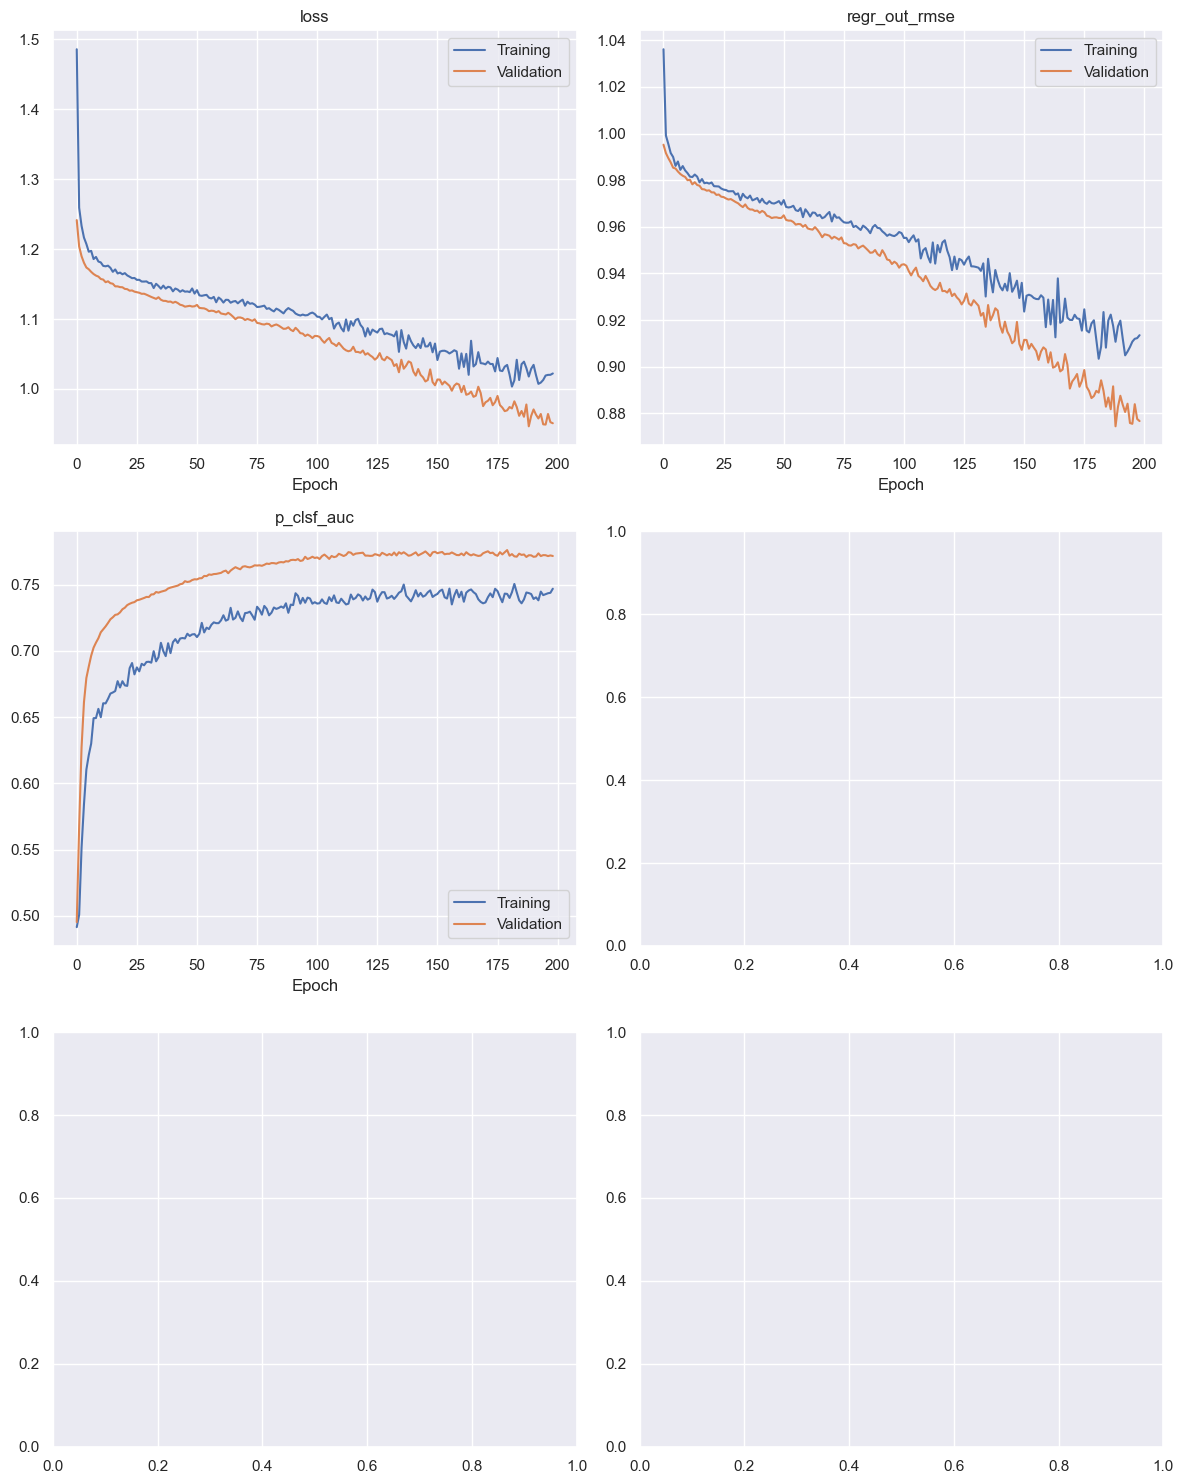

In [71]:
fig=plotmetrics(history,metrics=['loss','regr_out_rmse','p_clsf_auc'])
plt.show()

In [72]:
model.predict(X_test.loc[0:1,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


[array([[1.0830784],
        [0.729718 ]], dtype=float32),
 array([[0.2814342 ],
        [0.27946648]], dtype=float32)]

SHAP explanation

In [73]:
import shap
from shap import DeepExplainer

In [74]:
shap.initjs()

Regression Model

In [76]:
regr_model=Model(model.input,model.output[0])

In [77]:
data=pd.read_csv("OnlineNewsPopularity.csv")
data.columns=[col.strip() for col in data.columns]
data=data[data['shares']<100000]
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [78]:
data.drop("shares",axis=1,inplace=True)
data.shape

(39586, 60)

In [79]:
data.drop("url",axis=1,inplace=True)
data.shape

(39586, 59)

In [80]:
masker = shap.maskers.Independent(data)

In [81]:
explainer = shap.Explainer(regr_model, masker=masker)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 3960it [17:25,  3.79it/s]                                                              


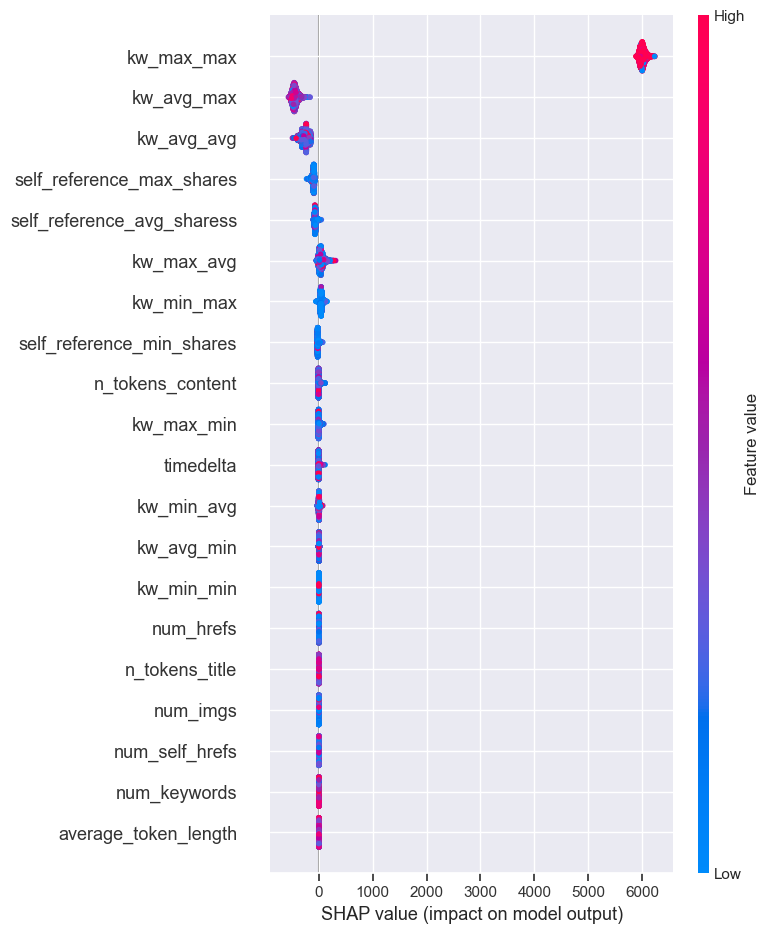

In [82]:
shap.summary_plot(shap_values, X_test)

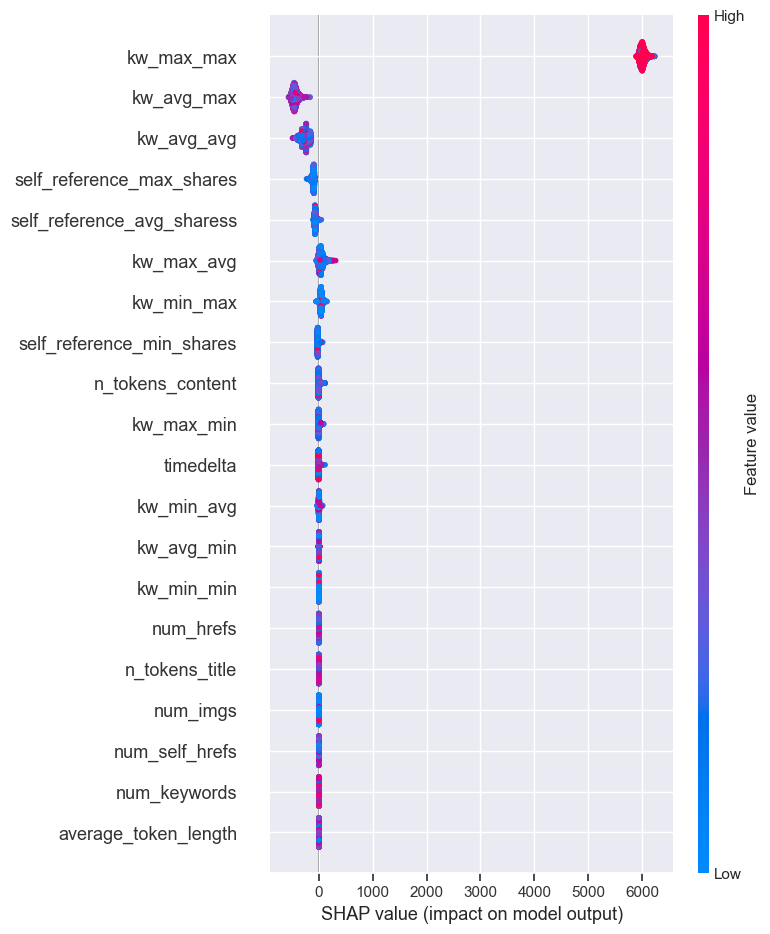

In [83]:
shap.summary_plot(shap_values, X_test)

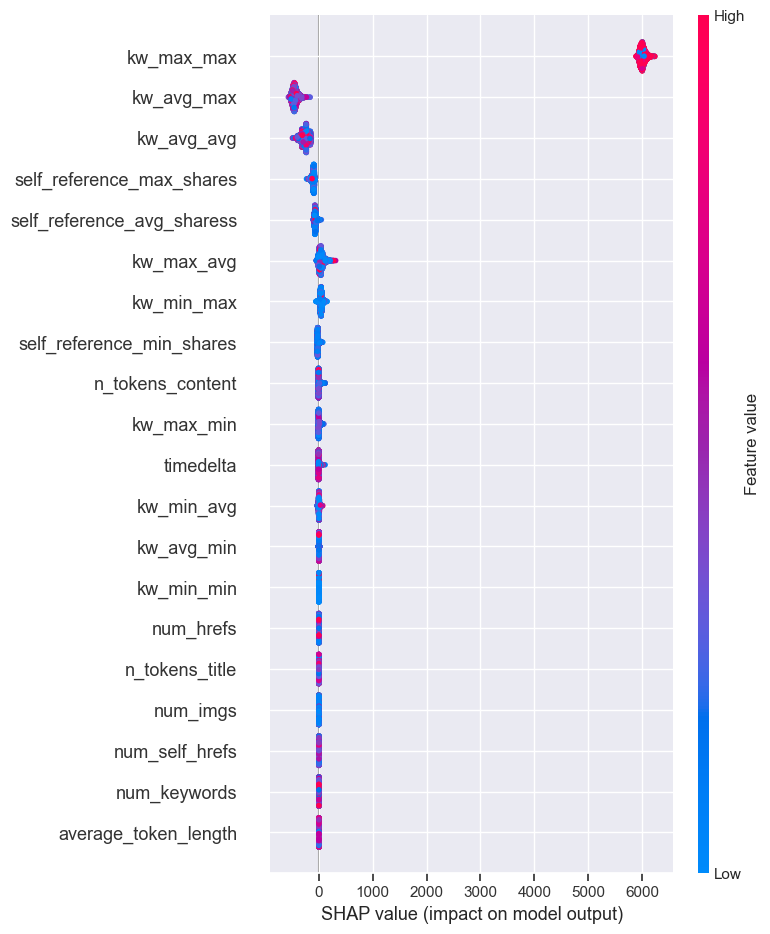

In [84]:
shap.summary_plot(shap_values, X_test)

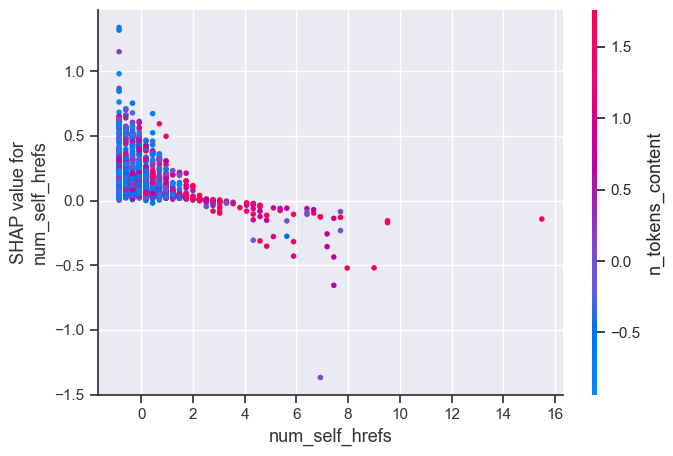

In [85]:
shap.dependence_plot("num_self_hrefs", shap_values, X_test,interaction_index="n_tokens_content")

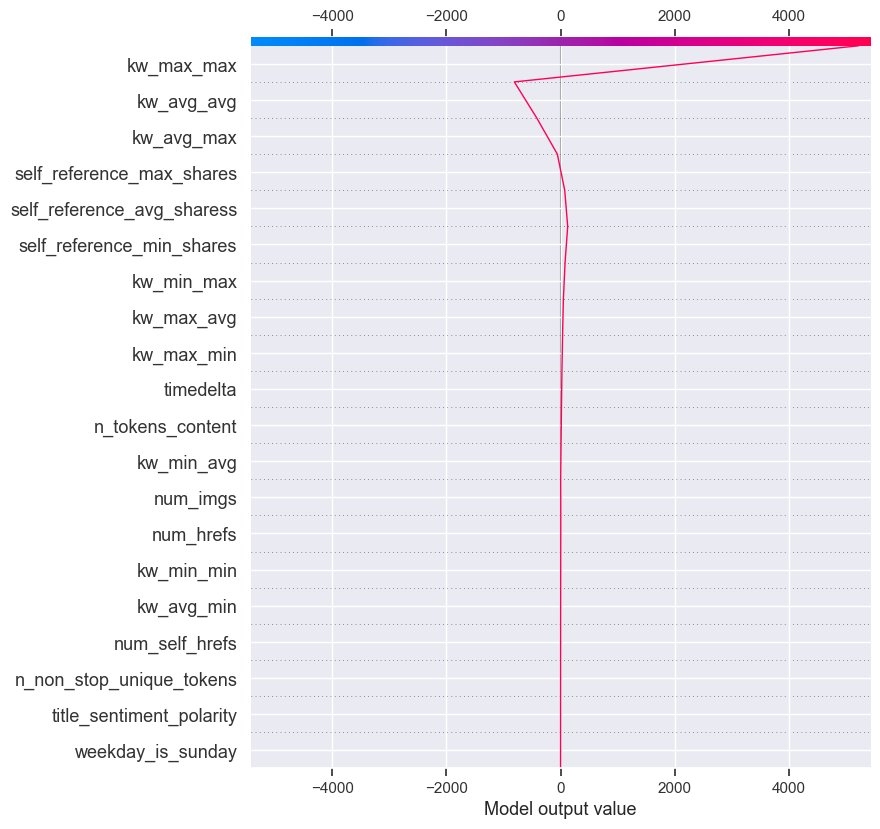

In [87]:
shap.decision_plot(explainer.linearize_link, shap_values[1], X_test.columns)

In [88]:
type(explainer)

shap.explainers._permutation.PermutationExplainer

In [91]:
shap.explainers._deep.deep_tf.op_handlers["Addv2"]=shap.explainers._deep.deep_tf.passthrough

In [95]:
explain_dataset=X_train.sample(n=5000,random_state=3)
shap_vals=explainer.shap_values(explain_dataset.values)

PermutationExplainer explainer: 5001it [21:47,  3.80it/s]                                                              


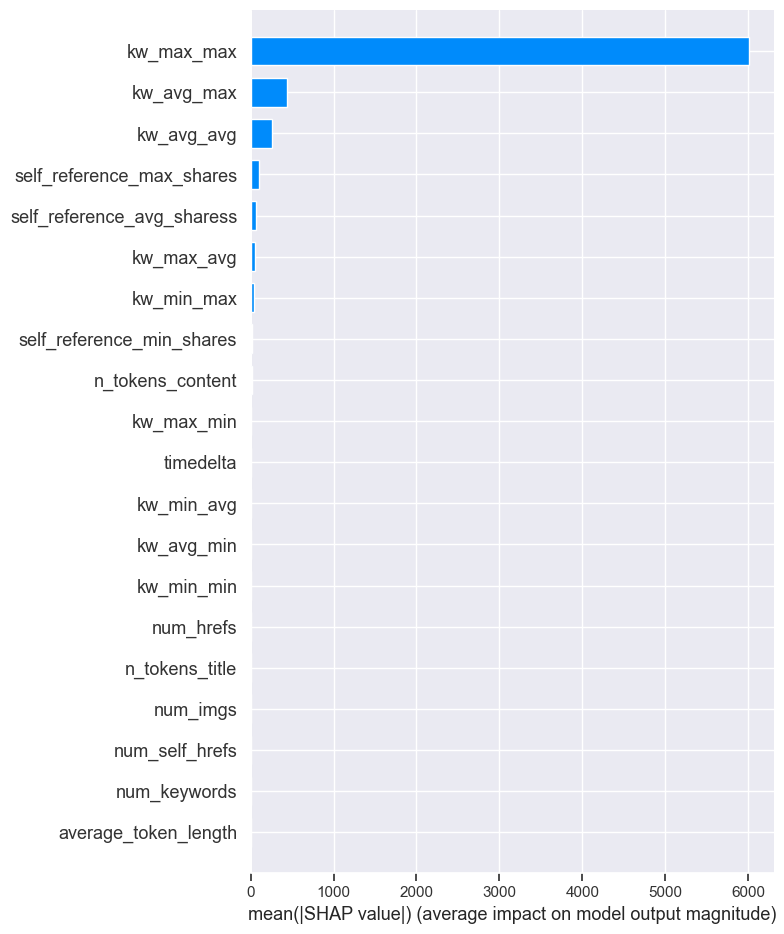

In [97]:
shap.summary_plot(shap_values=shap_vals,features=explain_dataset,feature_names=X_train.columns,max_display=20,plot_type='bar')

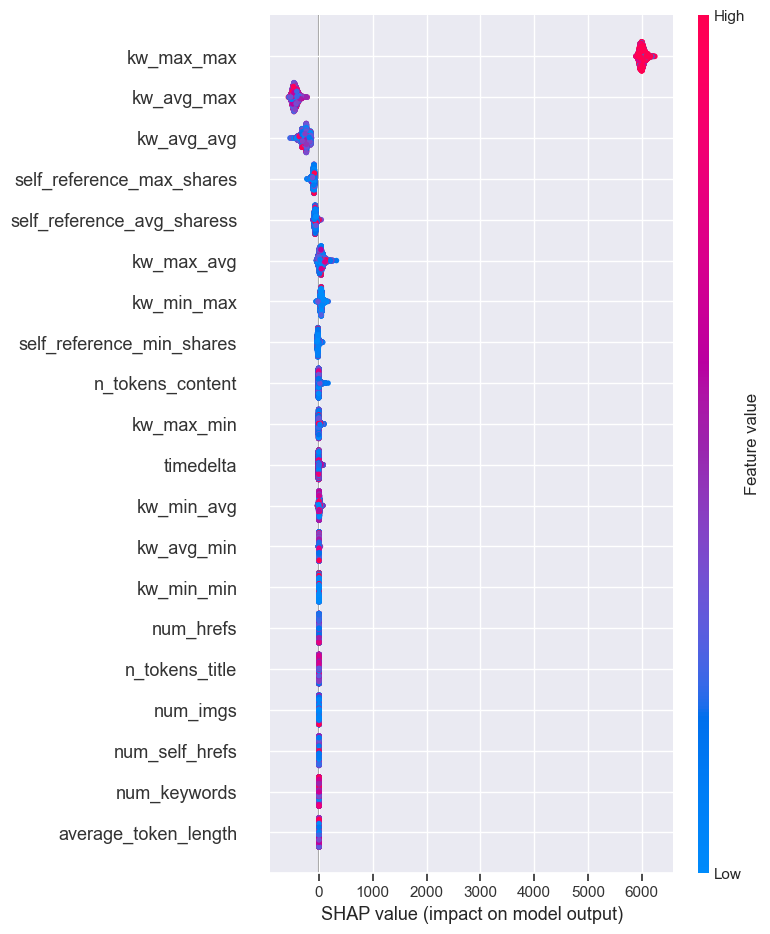

In [98]:
shap.summary_plot(shap_values=shap_vals,features=explain_dataset,feature_names=X_train.columns,max_display=20)

In [99]:
def sample_level_details(explain_index,explain_dataset,bg_data,shap_vals):
    sample_detail=pd.concat([explain_dataset.iloc[explain_index,:],bg_data.mean()],axis=1)
    sample_detail.columns=['sample_value','mean_bg_value']
    sample_detail['contribution']=shap_vals[0][explain_index]
    sample_detail=sample_detail.sort_values('contribution',ascending=False)
    return sample_detail

In [102]:
sample_data=X_train.sample(n=2000,random_state=2)
sample_detail=sample_level_details(explain_index=20,explain_dataset=explain_dataset,bg_data=sample_data,shap_vals=shap_vals)
sample_detail

,sample_value,mean_bg_value,contribution
timedelta,-0.346554,0.036143,0.876791
global_sentiment_polarity,1.536462,0.066391,0.876791
weekday_is_wednesday,0.000000,0.190500,0.876791
weekday_is_thursday,1.000000,0.180500,0.876791
weekday_is_friday,0.000000,0.142000,0.876791
weekday_is_saturday,0.000000,0.061000,0.876791
weekday_is_sunday,0.000000,0.074000,0.876791
is_weekend,0.000000,0.135000,0.876791
LDA_00,0.433530,0.025502,0.876791
LDA_01,-0.491278,-0.016157,0.876791


classififcation model

In [103]:
clsf_model=Model(model.input,model.output[1])

In [104]:
deep_explainer = shap.Explainer(clsf_model, masker=masker)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 3960it [19:00,  3.44it/s]                                                              


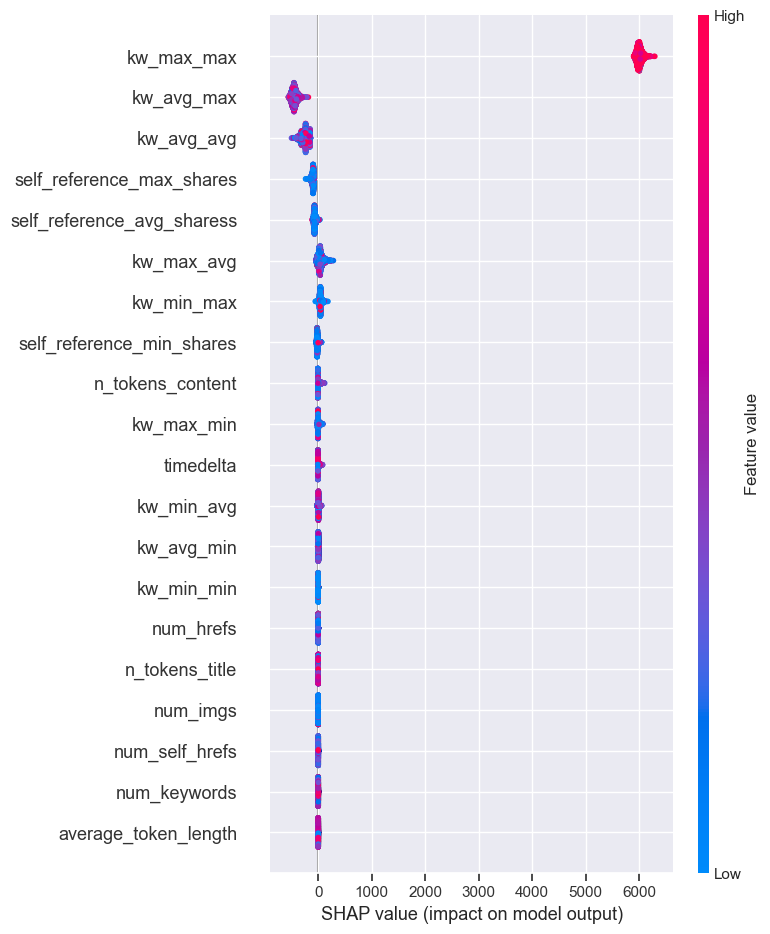

In [105]:
shap.summary_plot(shap_values, X_test)

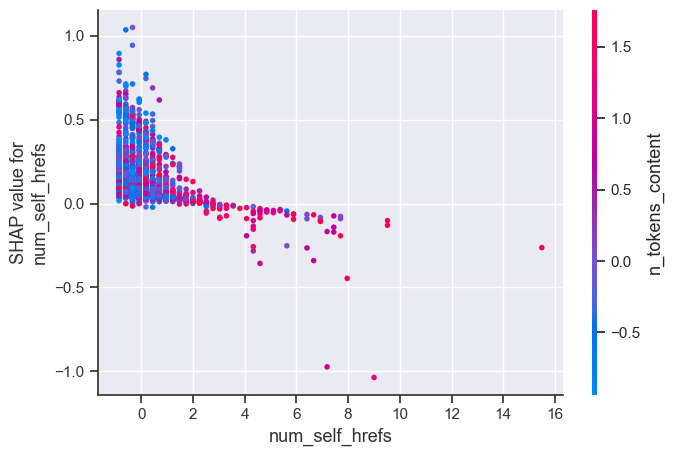

In [106]:
shap.dependence_plot("num_self_hrefs", shap_values, X_test,interaction_index="n_tokens_content")

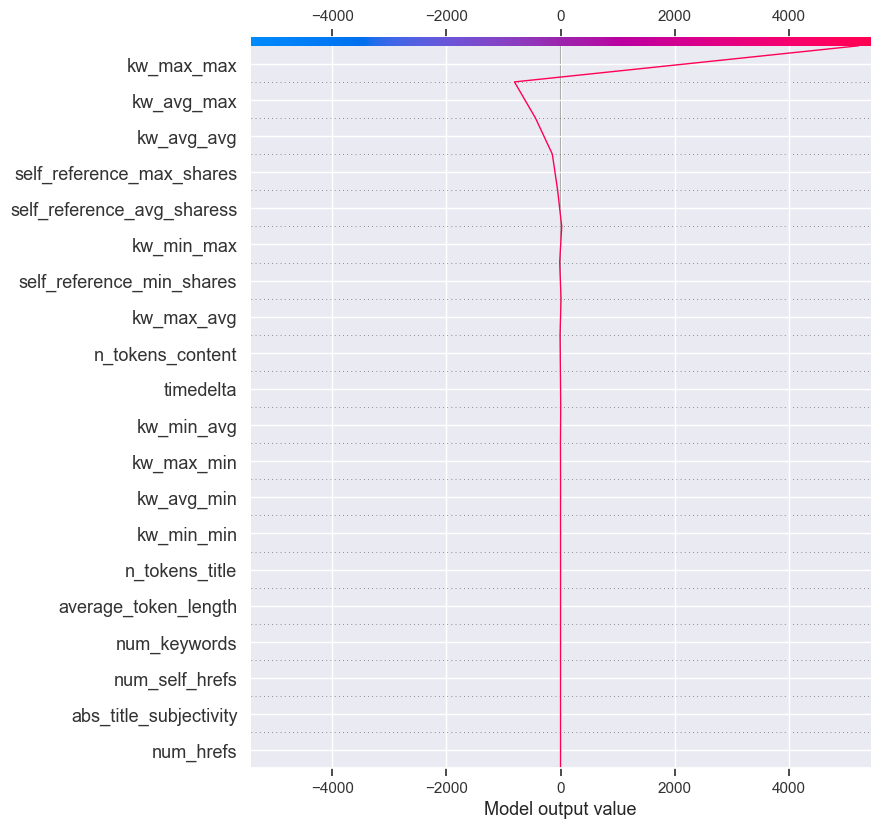

In [107]:
shap.decision_plot(explainer.linearize_link, shap_values[1], X_test.columns)

In [ ]:
shap.explainers._deep.deep_tf.op_handlers["Addv2"]=shap.explainers._deep.deep_tf.passthrough

In [ ]:
shap_vals_clsf=deep_explainer.shap_values(explain_dataset.values)

In [ ]:
shap.summary_plot(shap_values=shap_vals_clsf,features=explain_dataset,feature_names=X_train.columns,max_display=20,plot_type='bar')

In [ ]:
shap.summary_plot(shap_values=shap_vals,features=explain_dataset,feature_names=X_train.columns,max_display=20)

In [ ]:
sample_detail=sample_level_details(explain_index=20,explain_dataset=explain_dataset,bg_data=sample_data,shap_vals=shap_vals_clsf)
sample_detail